# Predicting Number of Rings on Abolones

### Group Name: Project Group 80
### Group Members: Anthony Limanto (s3898395)



## Table of Contents
* [Introduction](#Introduction) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Response Variable](#Response-Variable)
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)


## Introduction <a id='Introduction'></a>

### Dataset Source

This dataset was sourced from the UCI machine learning repository.
It details various attributes of a number of abalones such as its weight, height, etc.

### Dataset Details
This dataset is a collection of records of abalone, which are a type of sea snail, it contains information physical characteristics of an abalone such as its Gender, Length, Height, Diameter, Whole Weight, Shucked Weight (Weight of Meat), Viscera Weight (Gut Weight after bleeding), Shell Weight (after being dried) and its Rings. It aims to use this data to predict the number of rings on an abalone.

This dataset contains 4177 observations and 8 features. The dataset has no missing values

### Dataset Features
| Name | DataType | Units | Description |
| --- | --- | --- | --- |
| Gender | Categorical Nominal | NA | Sex of an abalone, Male, Female, also includes  I for infant |
| Length | Numeric Continuous | mm | The longest measurement of an abalone's shell |
| Diameter | Numeric Continuous | mm | Perpendicular to its length |
| Height | Numeric Continuous | mm | Height of an abalone with meat in its shell |
| Whole Weight | Numeric Continuous | grams | Total weight of a whole abalone |
| Shucked Weight | Numeric Continuous | grams | Weight of an abalone's meat |
| Viscera Weight | Numeric Continuous | grams | Gut Weight after bleeding |
| Shell Weight | Numeric Continuous | grams | Weight of its shell after being dried |
| Rings | Numeric Integer | NA | Gives the age of an abalone +1.5 years |

### Response Variable
The response Variable we are trying to predict in this project is the number of rings found on an abalone.

### Goals and Objectives
Abalones are a type of large marine gastropod mollusk found in the cold waters of New Zealand, Australia, South Africa, Japan. Their meat is highly prized for its incredibly rich and flavorful taste thus they are considered a delicacy in certain parts of the world, for instance in China they are commonly eaten during special occasion. 
Abalones are currently being threatened because of over-fishing and it almost became extinct, now due to strict fishing regulations its population is making a comeback. However, due to those aforementioned regulations and that they require special preparation before being eaten, they have become quite expensive.

The economical value of an abalone is directly tied to its age, the most common way of determining an abalone's age is through the number of rings on it. The rings on an abalone is captured through cutting the shell, staining it, then counting the rings through a microscope, this process is a tedious and time-consuming task, thus predicting its rings through measuring other physical characteristic that are easier to examine is beneficial.

And so, the objective of this project is to be able to determine the number of rings on an abalone through measurements such as weight, length, etc, which are easier to obtain, so we don't have to go through the tedious traditional way.



## Data Cleaning & Preprocessing


### Data Retrieval  

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

# Obatining the dataset through using this url

df = pd.read_csv('https://raw.githubusercontent.com/vaksakalli/datasets/master/abolone.csv')

df.head()

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Data Cleaning
Here we are going to check for missing values, incorrect values and drop any redundant columns


Checking that all the columns match with their intended data type.

In [2]:
print('Object means strings')
df.dtypes

Object means strings


Gender             object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

The dataset said that there are no missing values but it doesn't hurt to double check.

In [3]:
print('These are the numbet of missing values in this dataset')
df.isnull().sum()

These are the numbet of missing values in this dataset


Gender            0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Lets now check for any incorrect values, such as negative weight, length, etc.

In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df[df['Height'] == 0].count()

Gender            2
Length            2
Diameter          2
Height            2
Whole weight      2
Shucked weight    2
Viscera weight    2
Shell weight      2
Rings             2
dtype: int64

No negative values but it says that there are 2 abalones with a height of zero, this doesn't make any sense, so lets drop these values.

In [6]:
df = df.drop(df[df['Height']==0].index)
df.shape

(4175, 9)

In [7]:
df['Gender'].unique()

array(['M', 'F', 'I'], dtype=object)

Gender "I" seems unusual but it represents an infant abalone which is classed differently to male and female so we will keep it in the dataset.

It seems all of the data is already cleaned so nothing else needs to be done.

## Data Exploration and Visualisation
We are now going to start exploring the data and visualise it through the use of graphs

### Univariate Charts

#### Bar Chart of Gender

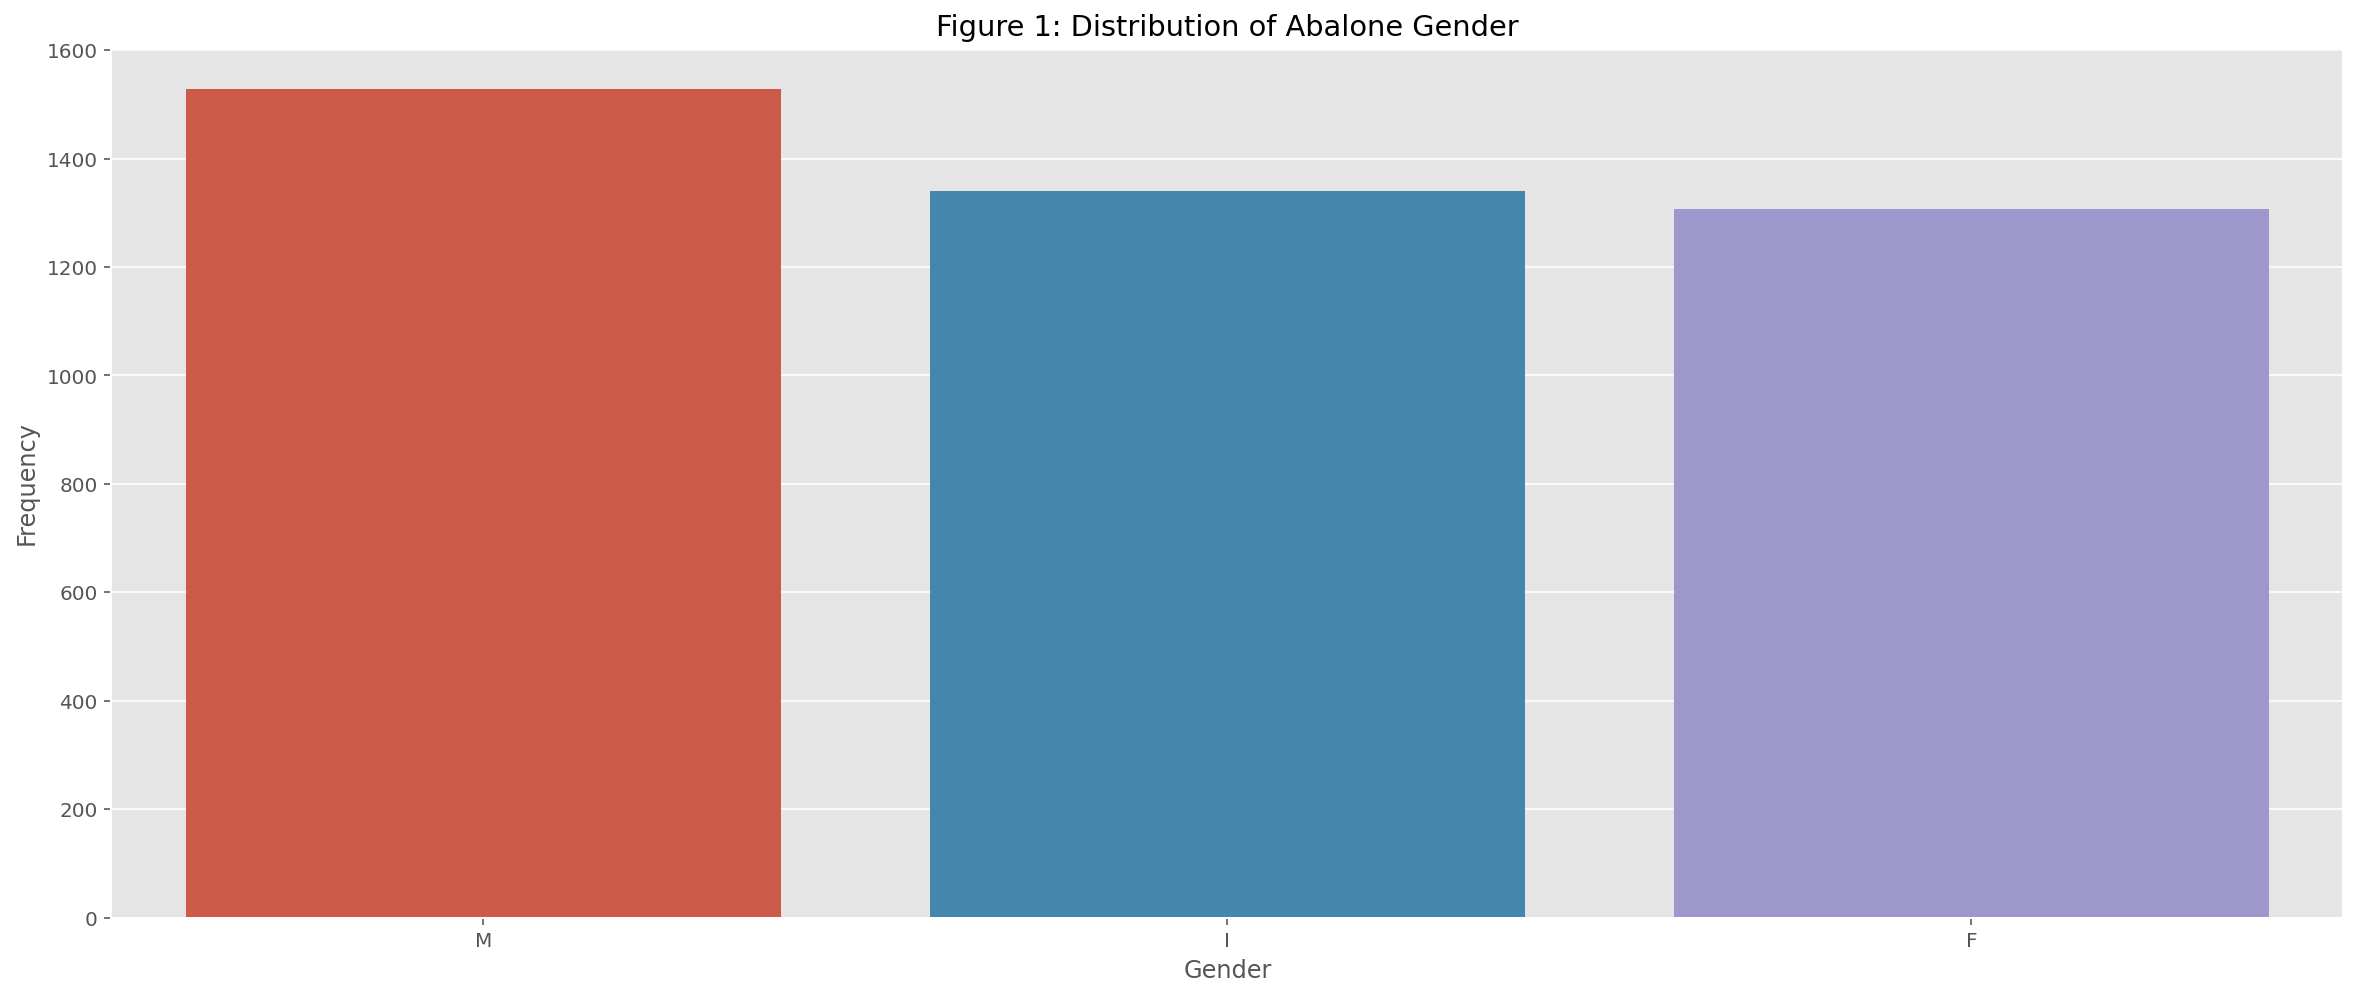

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

plt.figure(figsize = (20,8))
sns.countplot(x = 'Gender', data = df, palette = None, order = df['Gender'].value_counts().index)
plt.title('Figure 1: Distribution of Abalone Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [9]:
male_percent = (df['Gender']== 'M').sum() / df['Gender'].count() * 100
female_percent = (df['Gender']== 'F').sum() / df['Gender'].count() * 100
infant_percent = (df['Gender']== 'I').sum() / df['Gender'].count() * 100
print(f'The figure aboves shows that {female_percent:.2f}% are female, {infant_percent:.2f}% are infant, and {male_percent:.2f}% are male.')

The figure aboves shows that 31.31% are female, 32.10% are infant, and 36.60% are male.


#### Boxplot of Rings

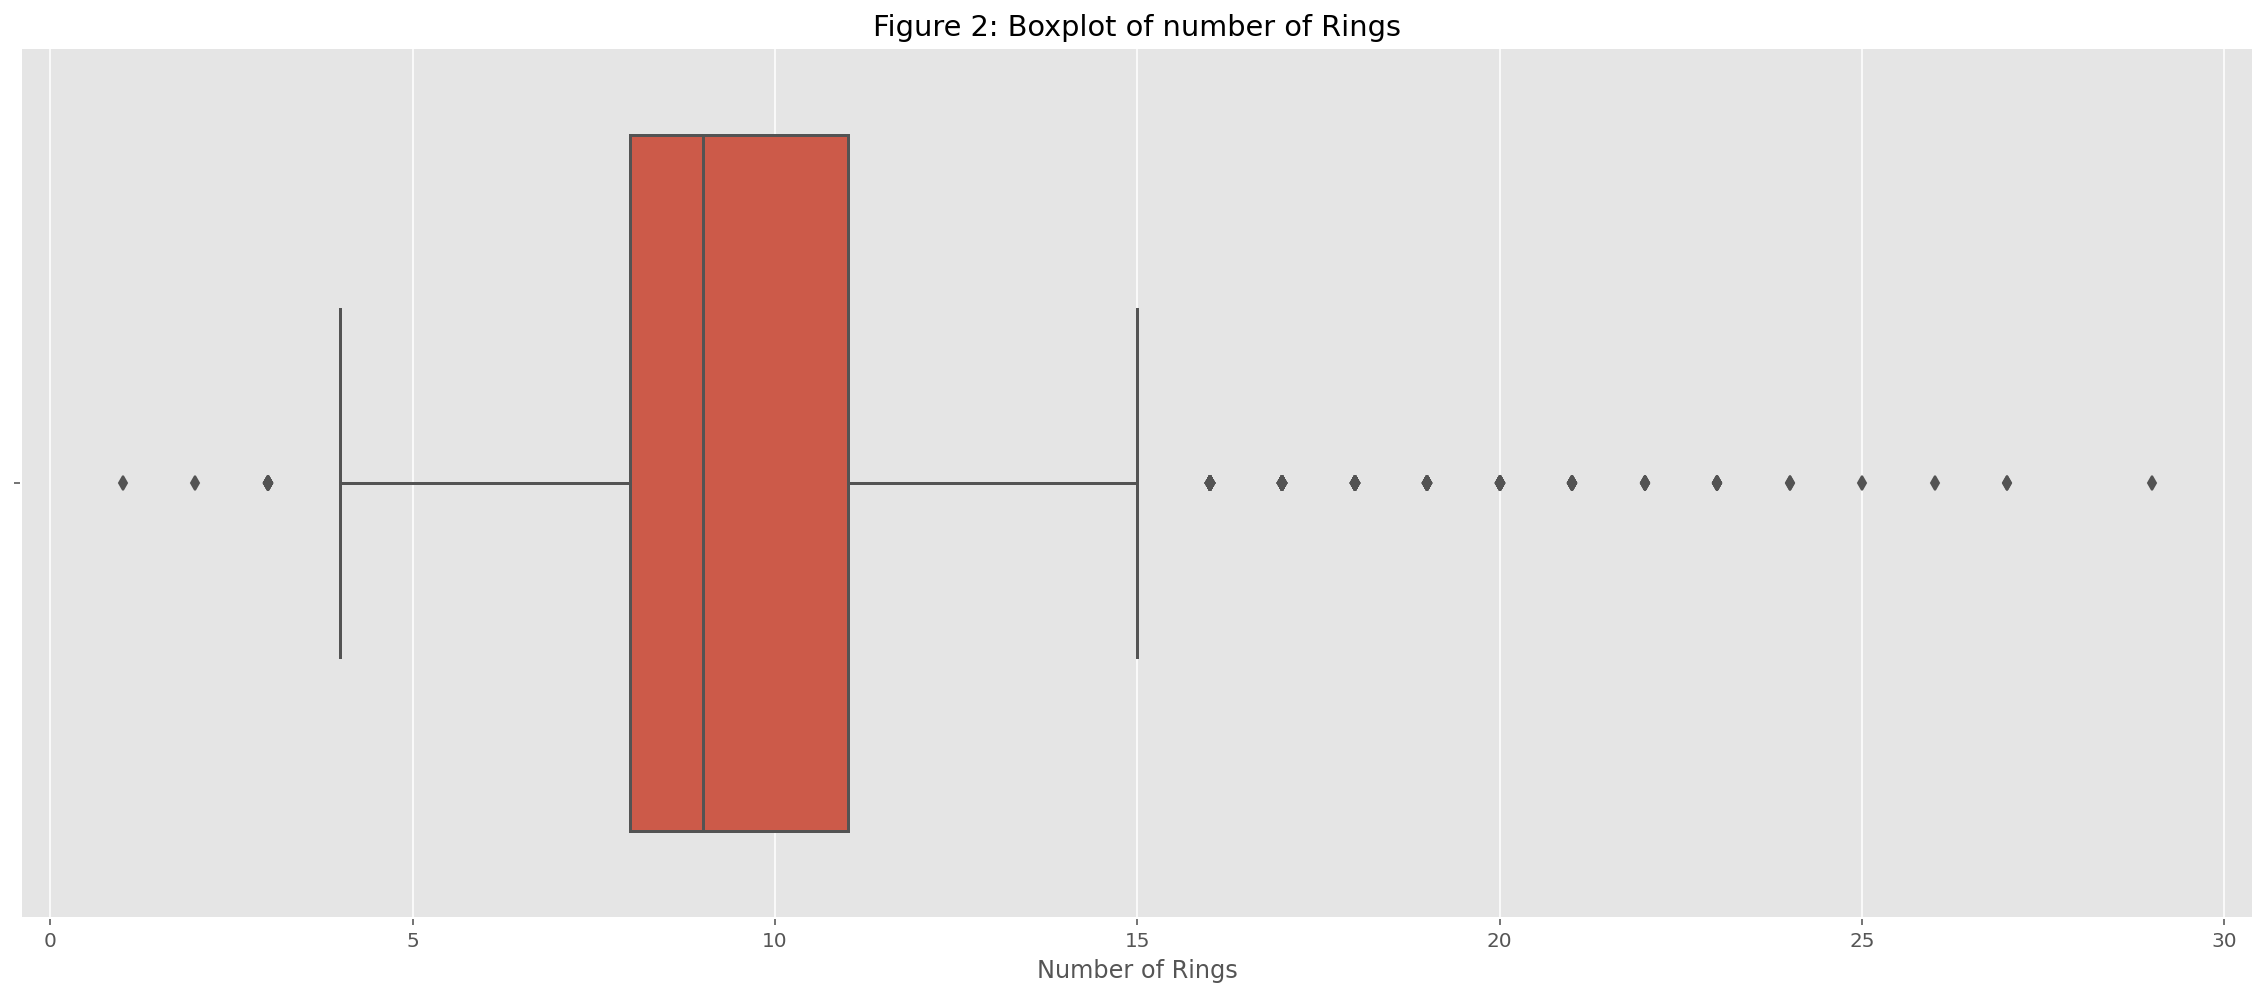

In [10]:
plt.figure(figsize = (20,8))
sns.boxplot(data = df, x = 'Rings')
plt.title('Figure 2: Boxplot of number of Rings')
plt.xlabel('Number of Rings')
plt.show()

In Figure2 we can see that there are a couple of outliers and that the number of rings is right-skewed.

#### Boxplot of Whole weight

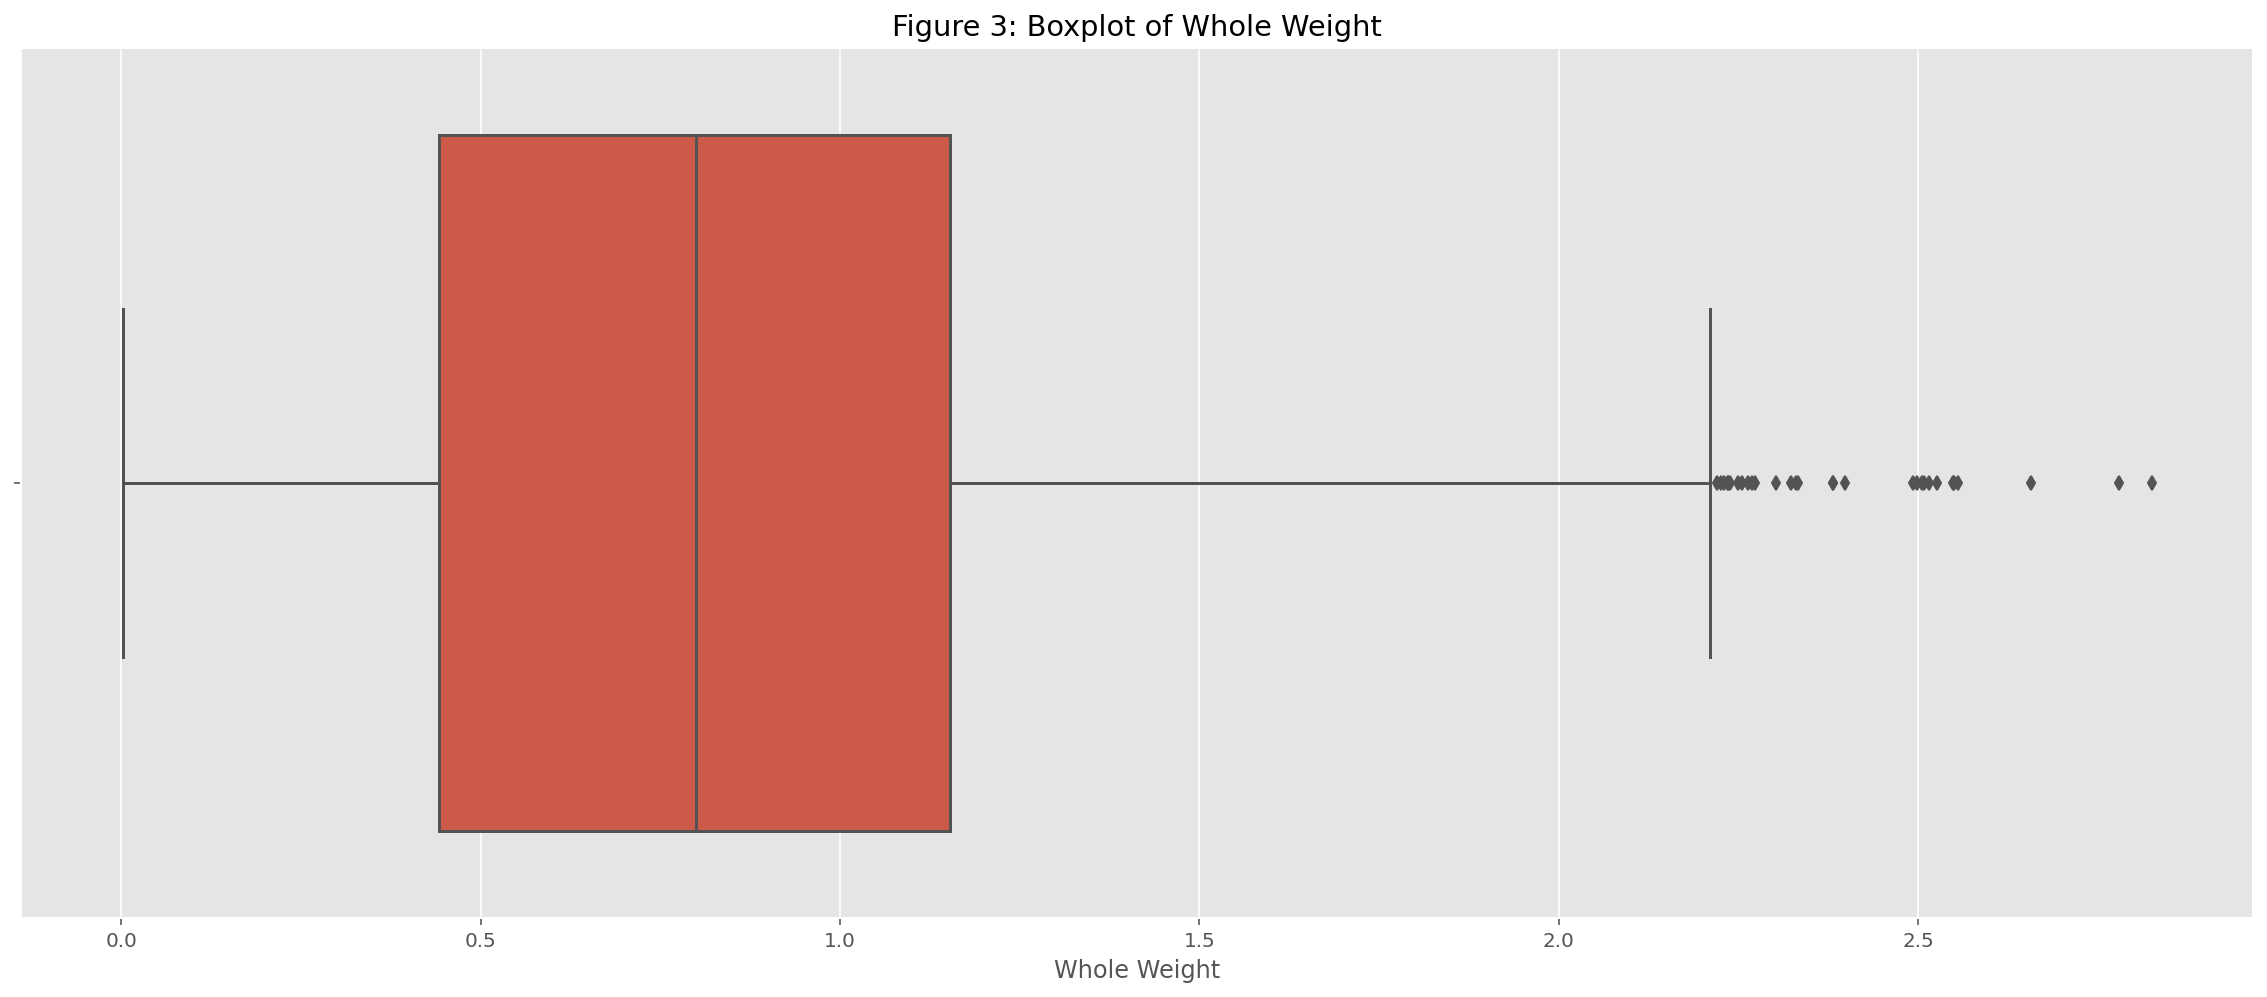

In [11]:
plt.figure(figsize = (20,8))
sns.boxplot(df['Whole weight'])
plt.title('Figure 3: Boxplot of Whole Weight')
plt.xlabel('Whole Weight')
plt.show()

This figure shows that Whole weight is right-skewed

#### Boxplot of Length

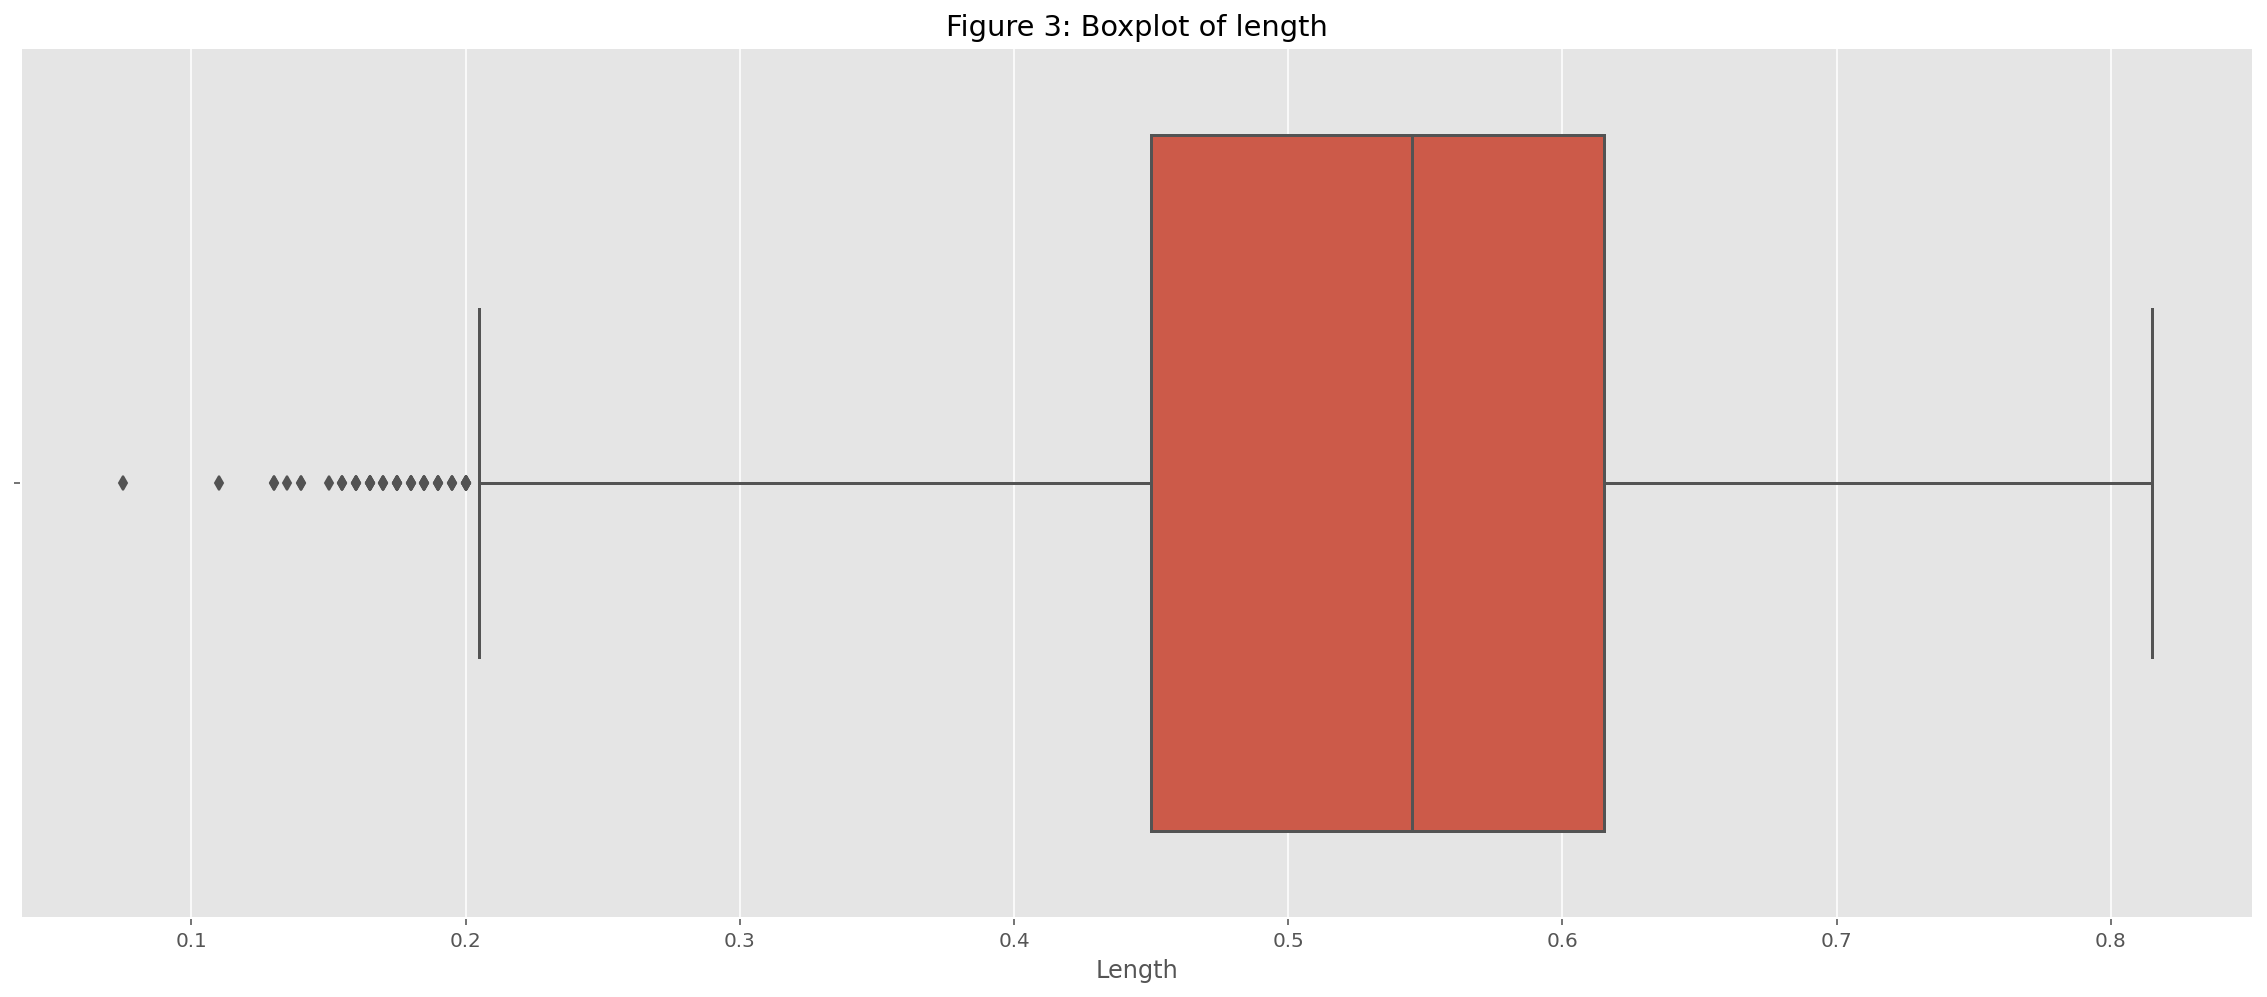

In [12]:
plt.figure(figsize = (20,8))
sns.boxplot(df['Length'])
plt.title('Figure 3: Boxplot of length')
plt.xlabel('Length')
plt.show()

### Two-Variable Visualisation

#### Scatterplot of Rings by Whole weight

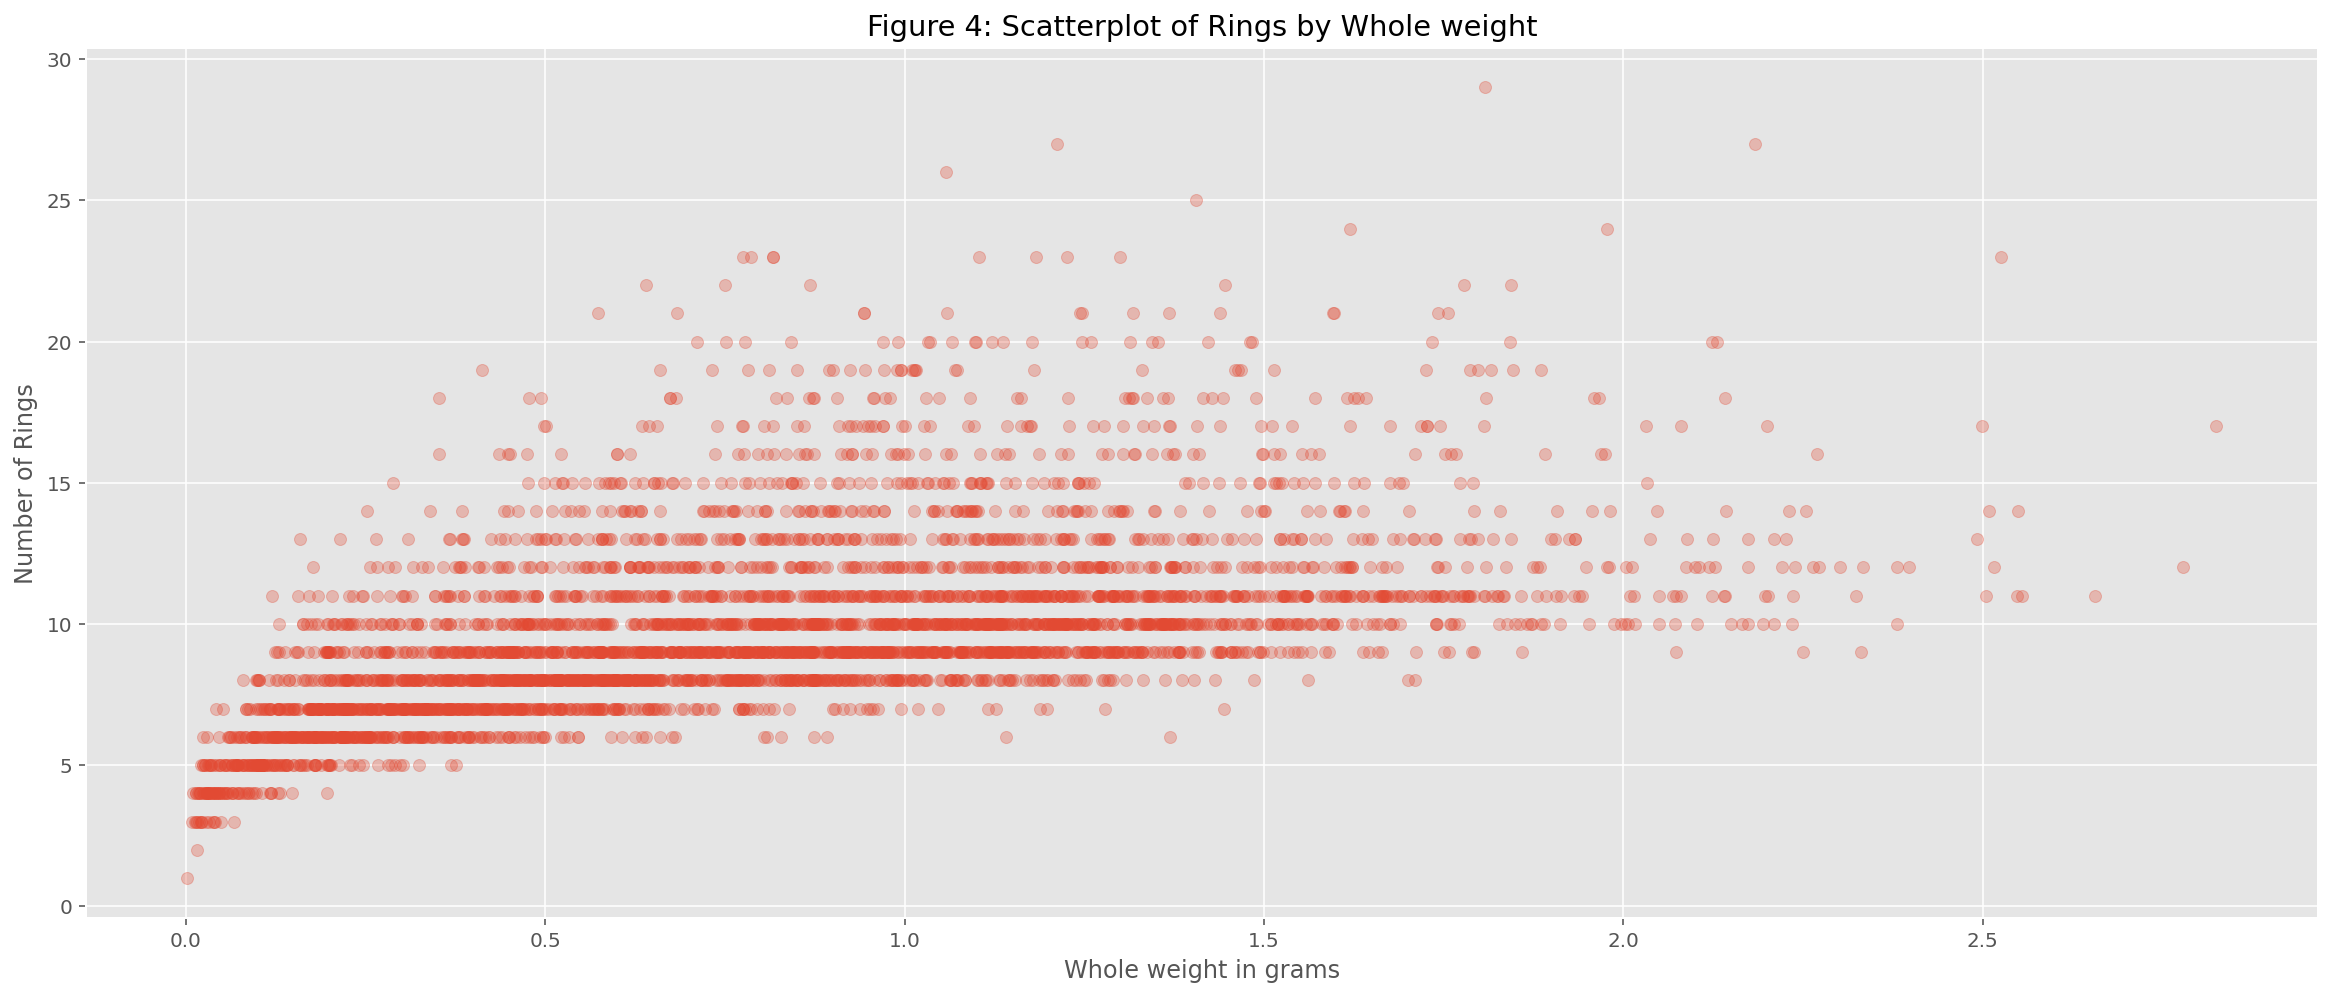

In [13]:
plt.figure(figsize = (20,8))

plt.scatter(df['Whole weight'], df['Rings'], alpha = 0.3)
plt.title('Figure 4: Scatterplot of Rings by Whole weight')
plt.ylabel('Number of Rings')
plt.xlabel('Whole weight in grams')

plt.show()

Figure 4 shows that heavier abalones are more likely to have more rings.

#### Boxplot of Rings by Gender

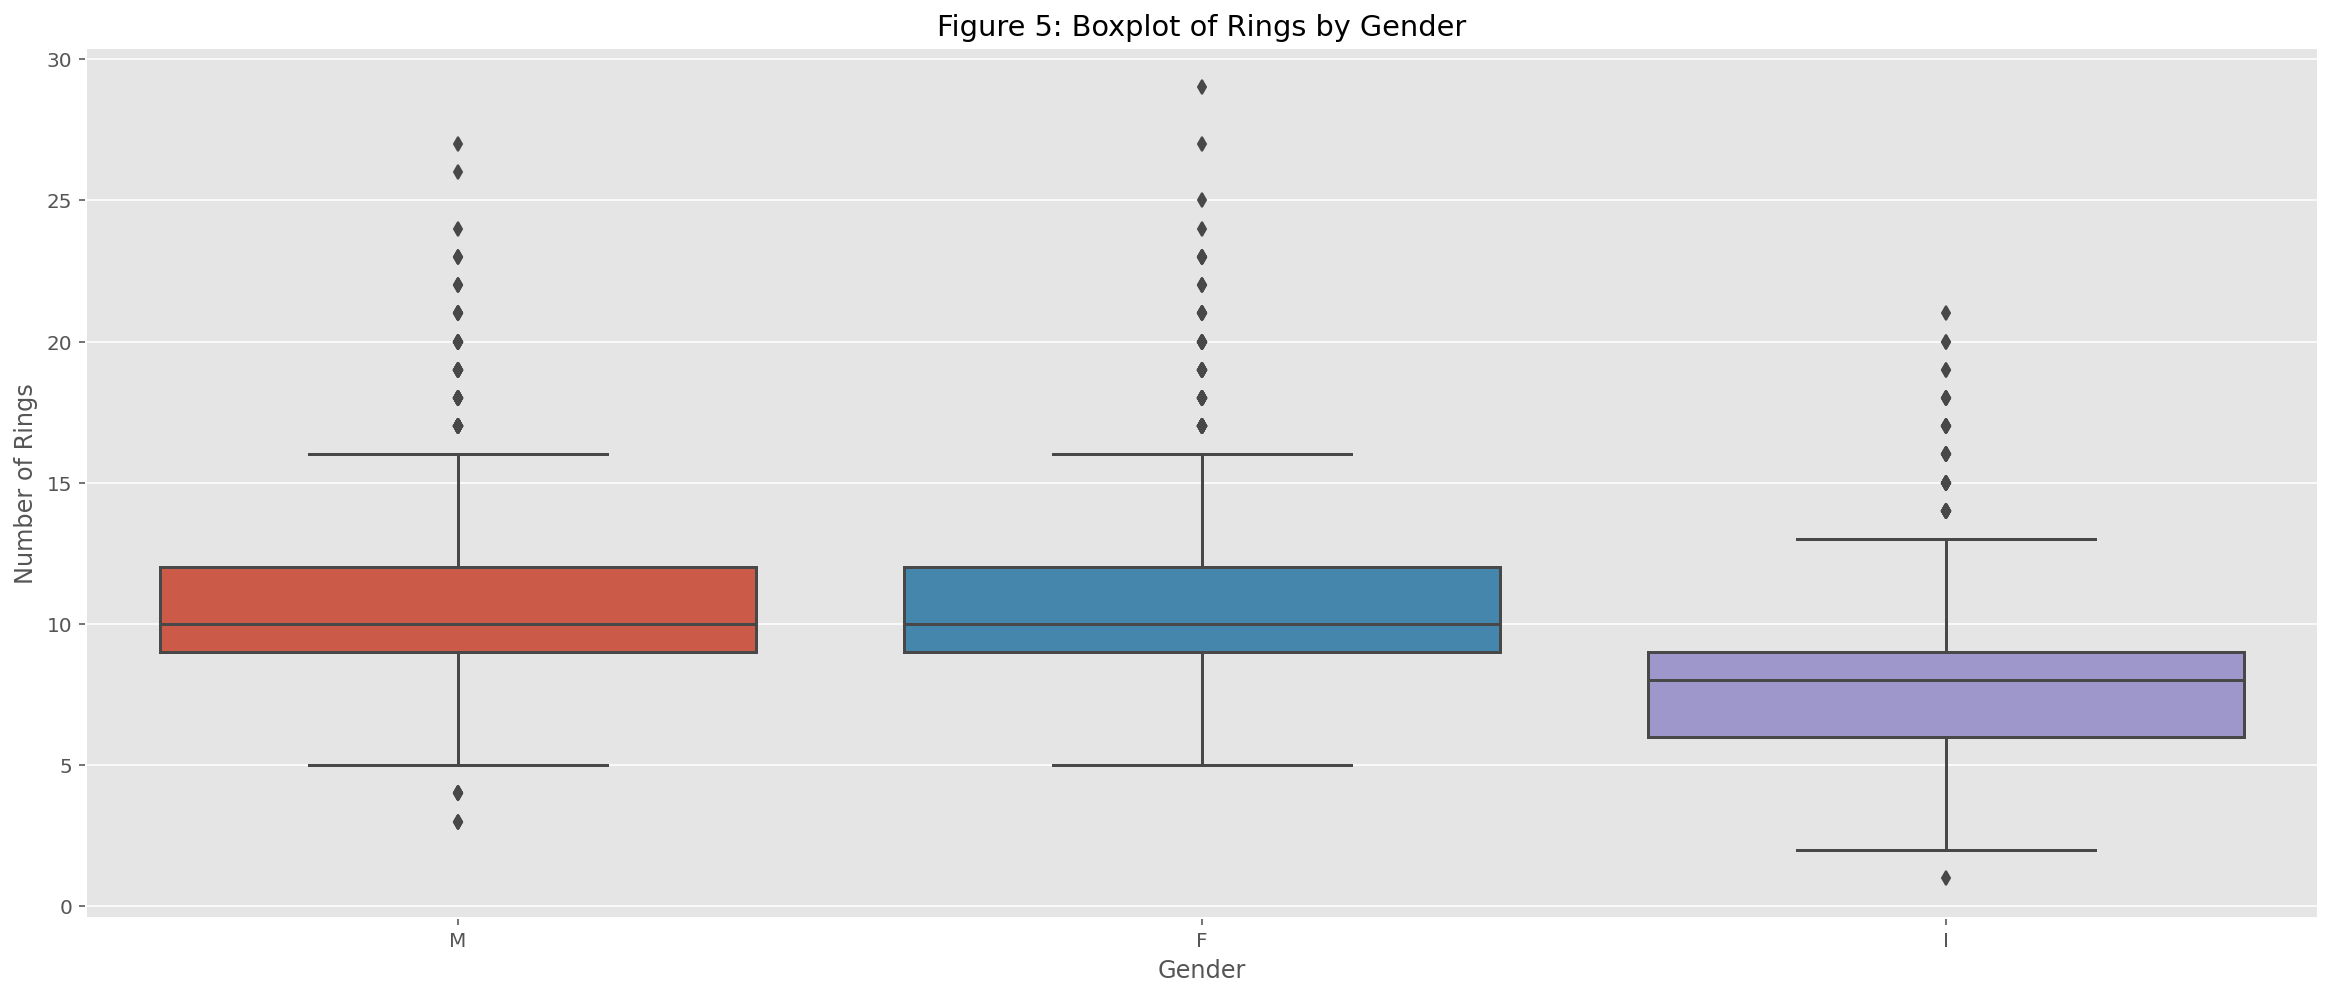

In [14]:
plt.figure(figsize = (20,8))

sns.boxplot(df['Gender'], df['Rings']);
plt.title('Figure 5: Boxplot of Rings by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Rings')

plt.show()

This figure illustrates that there is no discernible difference between males and females in terms of number of rings, as their boxplots are very similar. However, it also shows that infant abalones have on average less rings that their adult counterparts.

#### Scatterplot of Rings by Length

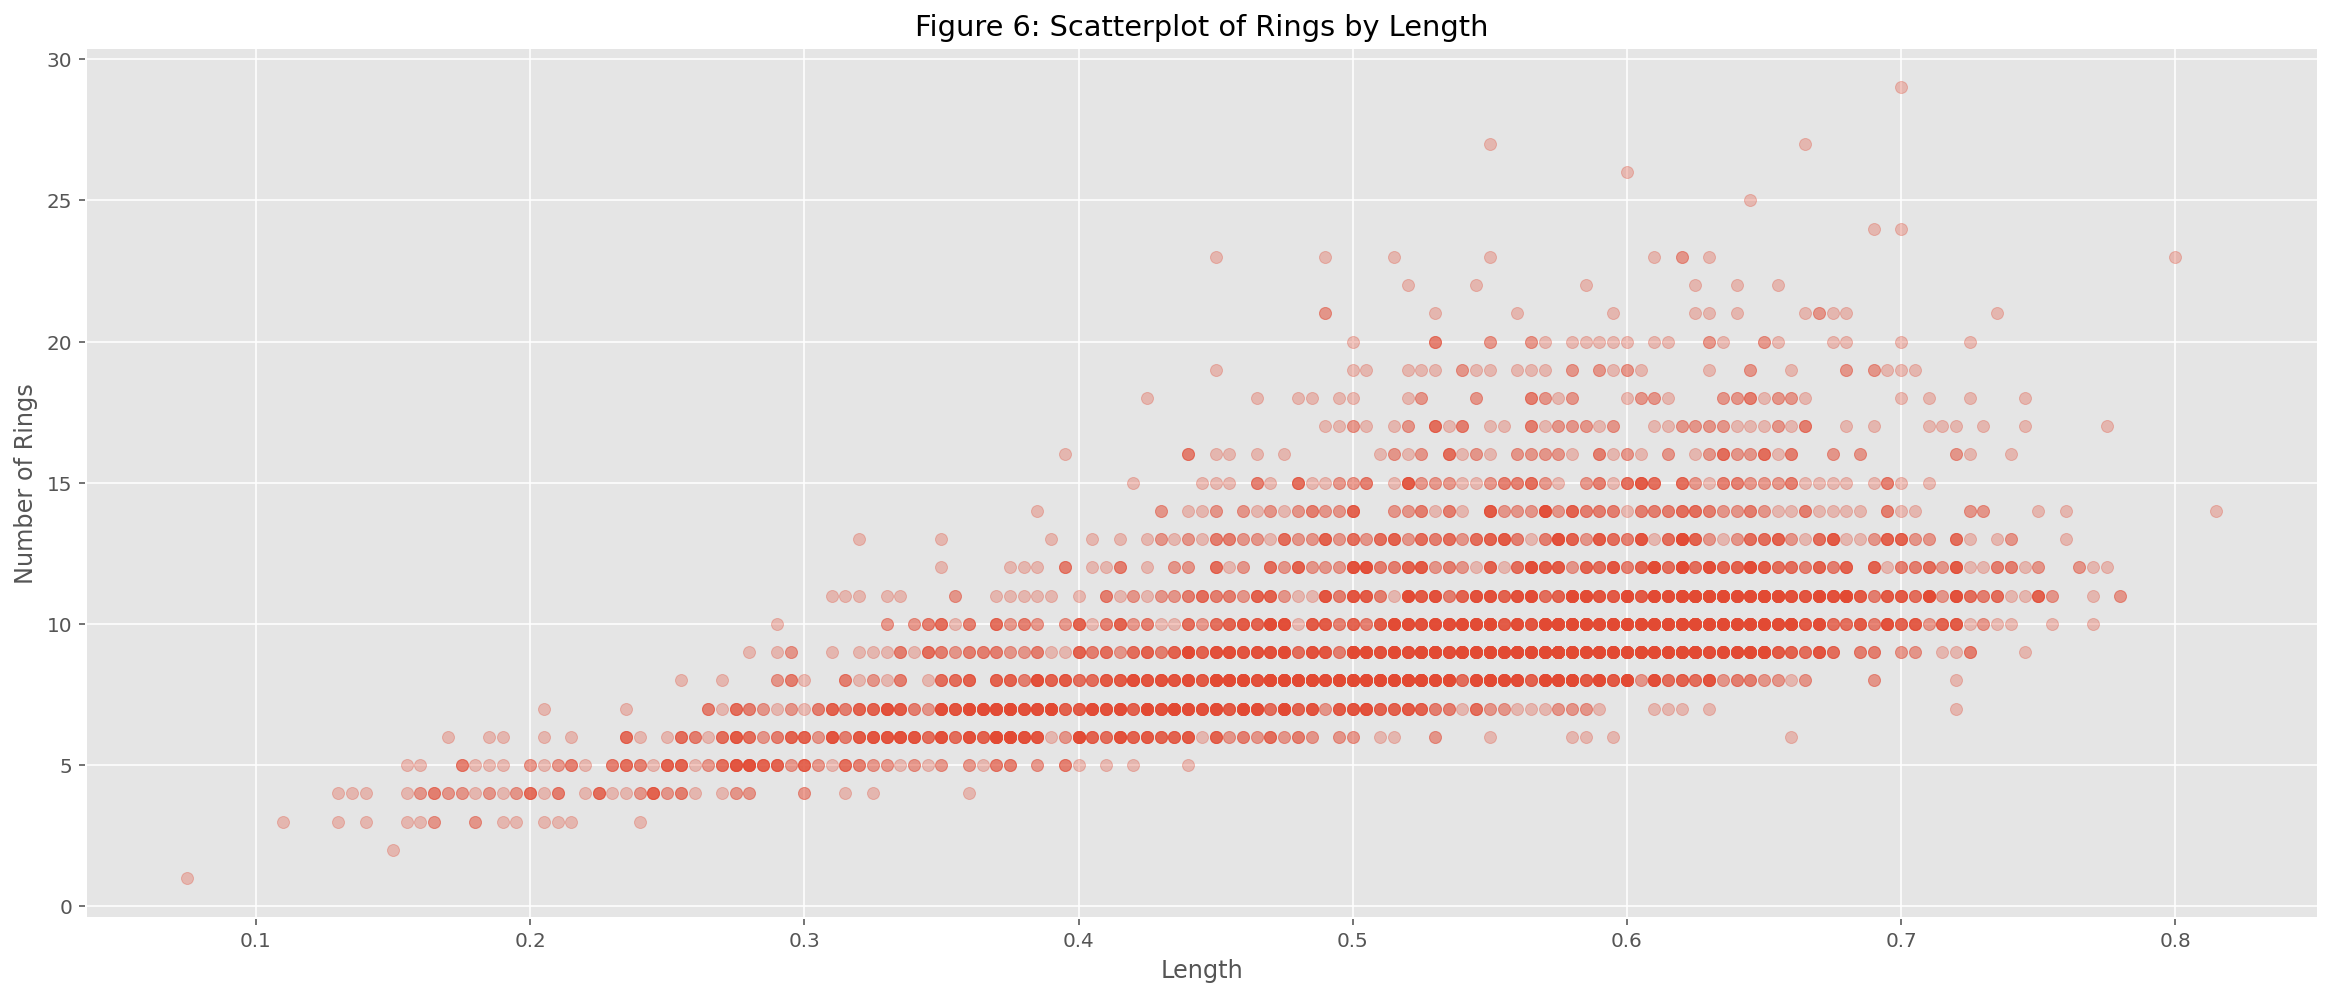

In [15]:
plt.figure(figsize = (20,8))

plt.scatter(df['Length'], df['Rings'], alpha = 0.3)
plt.title('Figure 6: Scatterplot of Rings by Length')
plt.ylabel('Number of Rings')
plt.xlabel('Length')

plt.show()

The figure above shows that abalone's rings and its length are positively associated.

### Three-Variable Visualisation

#### Scatterplot of Rings by Whole Weight coloured by Gender

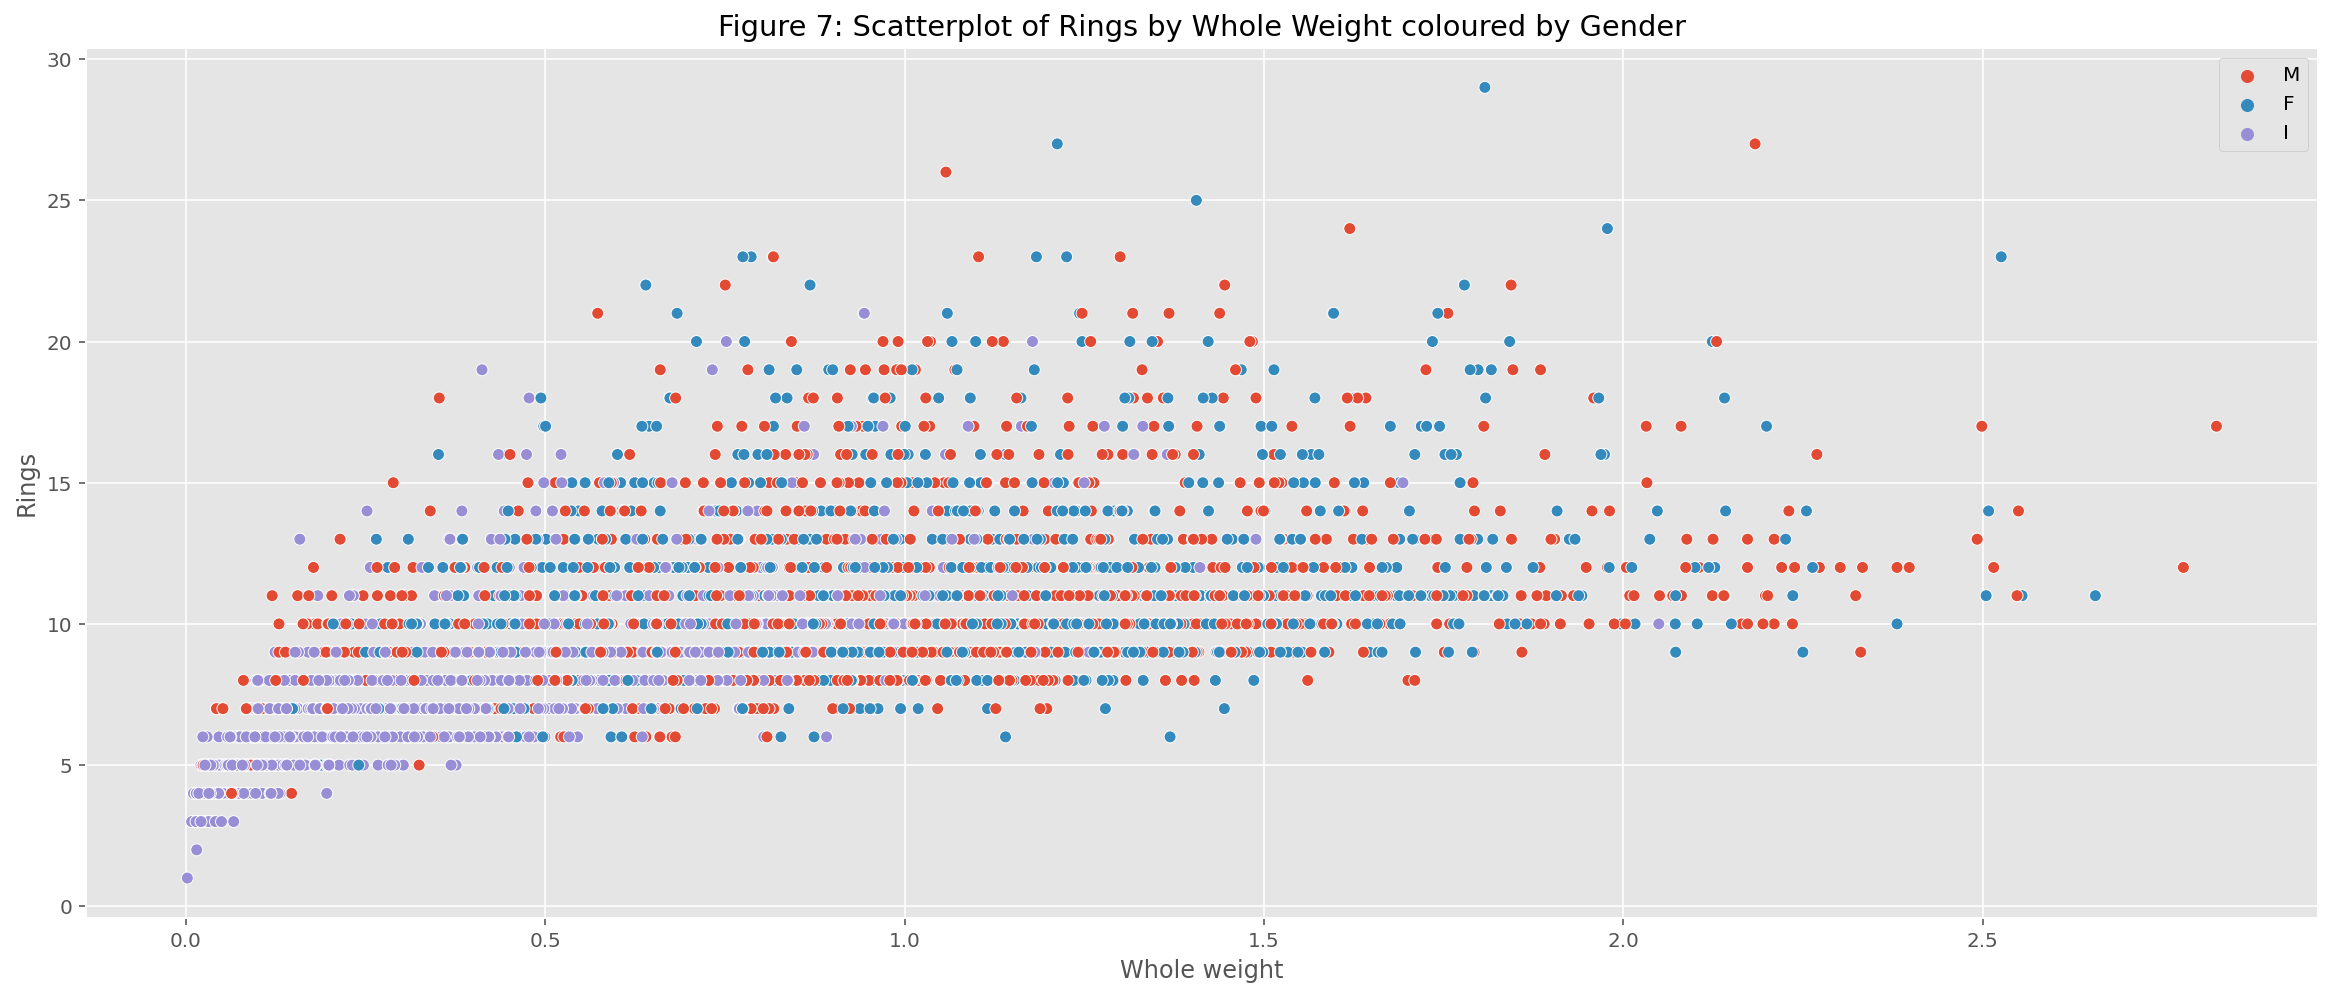

In [16]:
plt.figure(figsize = (20,8))

sns.scatterplot(df['Whole weight'], df['Rings'], hue = df['Gender'])
plt.title('Figure 7: Scatterplot of Rings by Whole Weight coloured by Gender');
plt.legend(loc = 'upper right')
plt.show();

#### Scatterplot of Rings by Length coloured by Gender

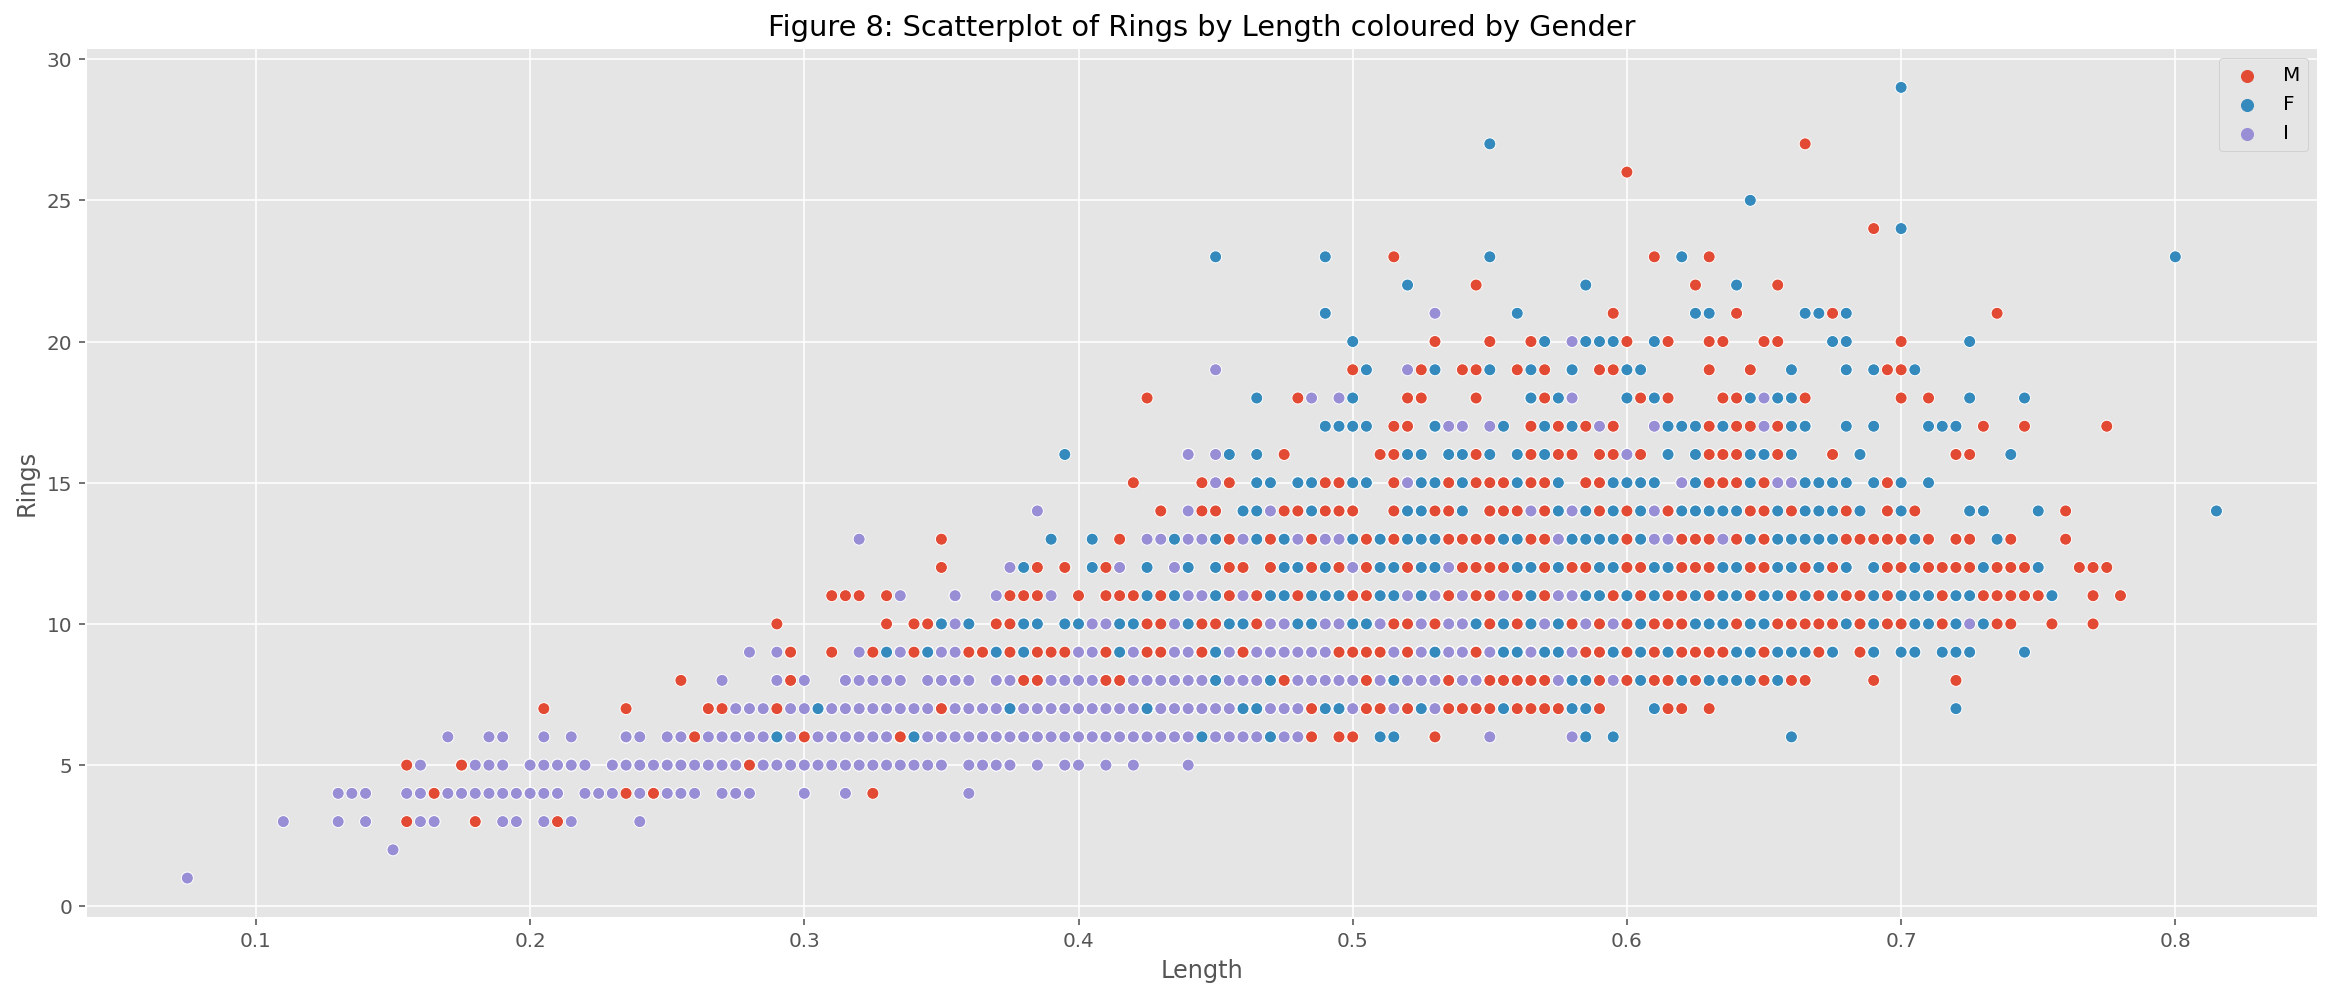

In [17]:
plt.figure(figsize = (20,8))

sns.scatterplot(df['Length'], df['Rings'], hue = df['Gender'])
plt.title('Figure 8: Scatterplot of Rings by Length coloured by Gender');
plt.legend(loc = 'upper right')
plt.show();

#### Scatterplot of Rings by Height coloured by Gender

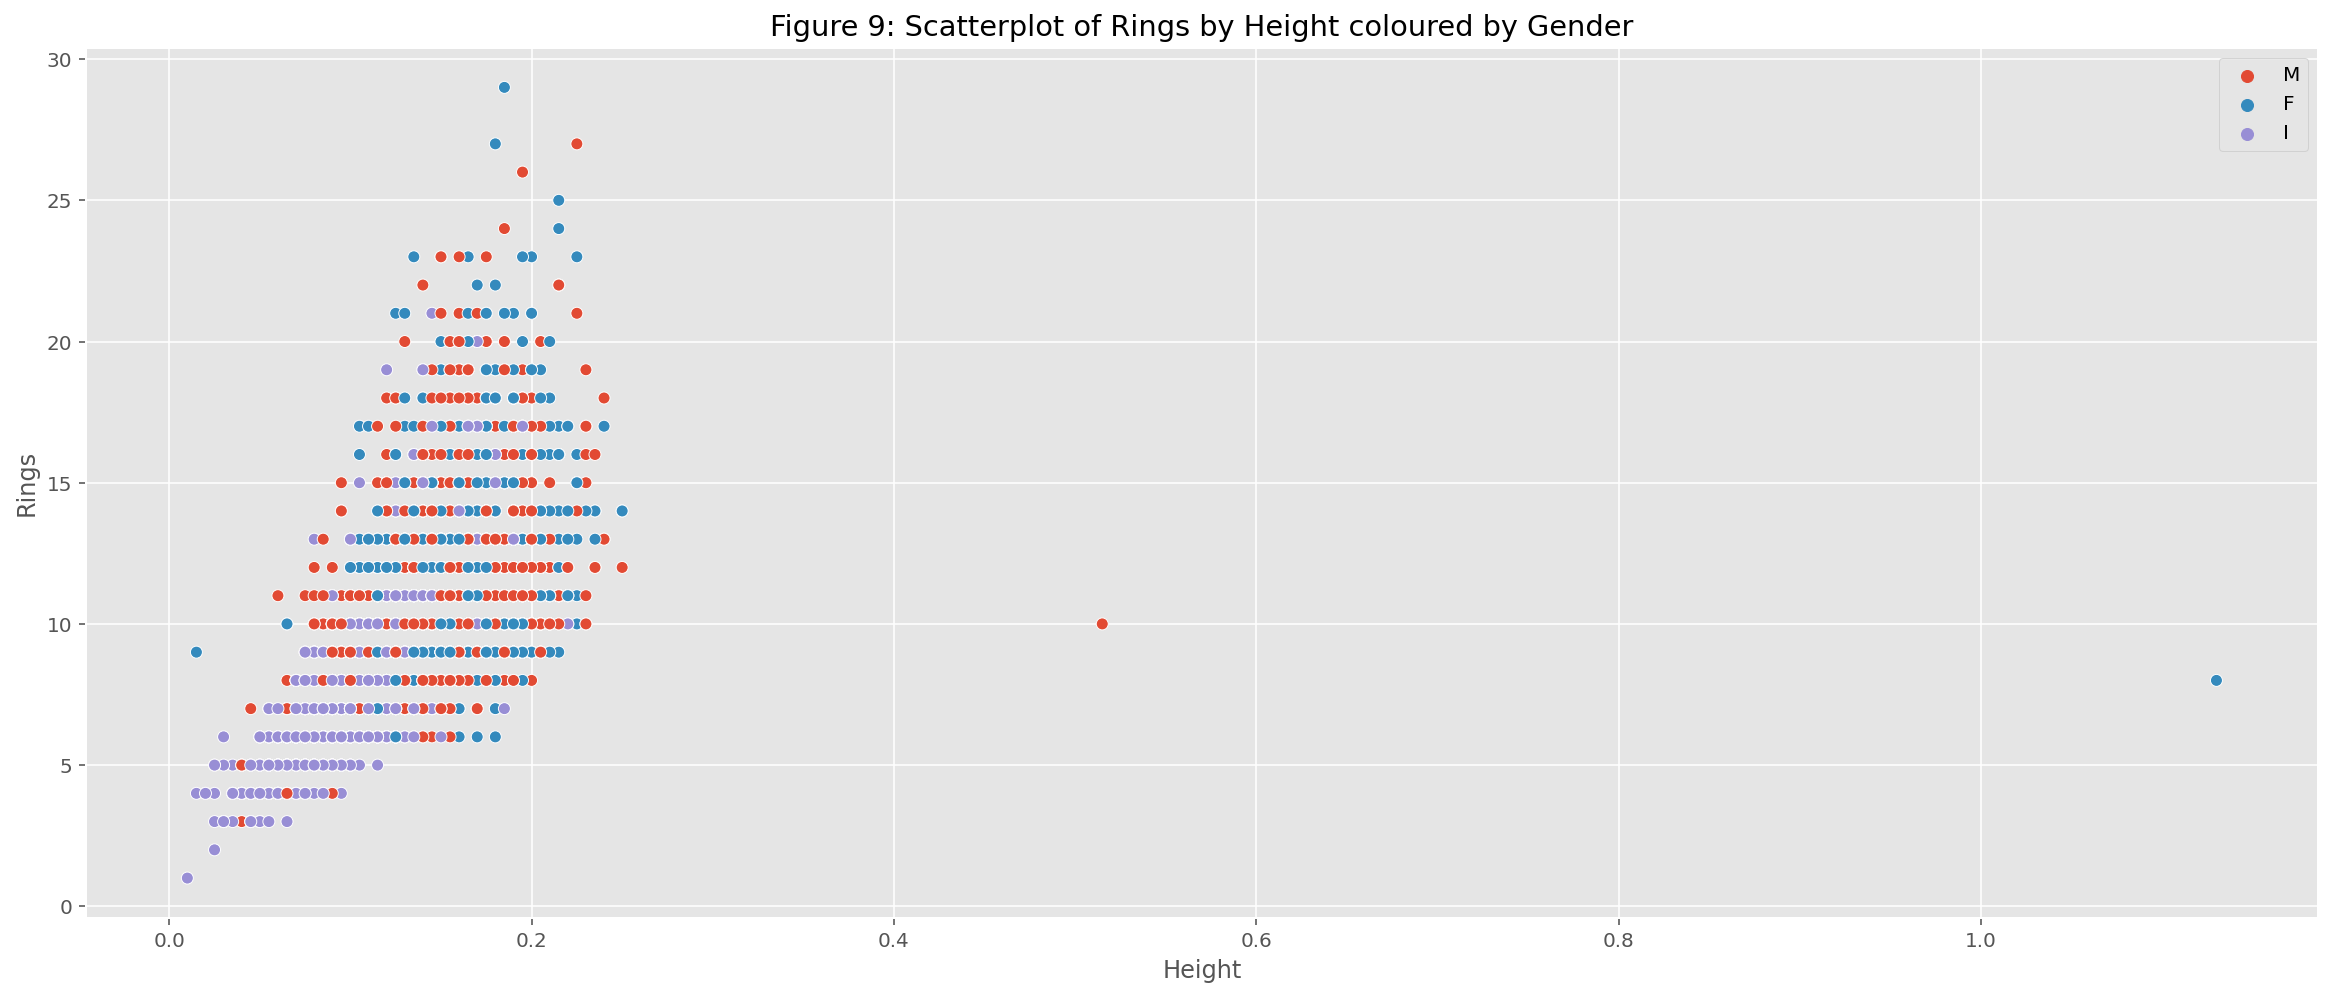

In [18]:
plt.figure(figsize = (20,8))

sns.scatterplot(df['Height'], df['Rings'], hue = df['Gender'])
plt.title('Figure 9: Scatterplot of Rings by Height coloured by Gender');
plt.legend(loc = 'upper right')
plt.show();

#### Scatterplot of Rings by Diameter coloured by Gender

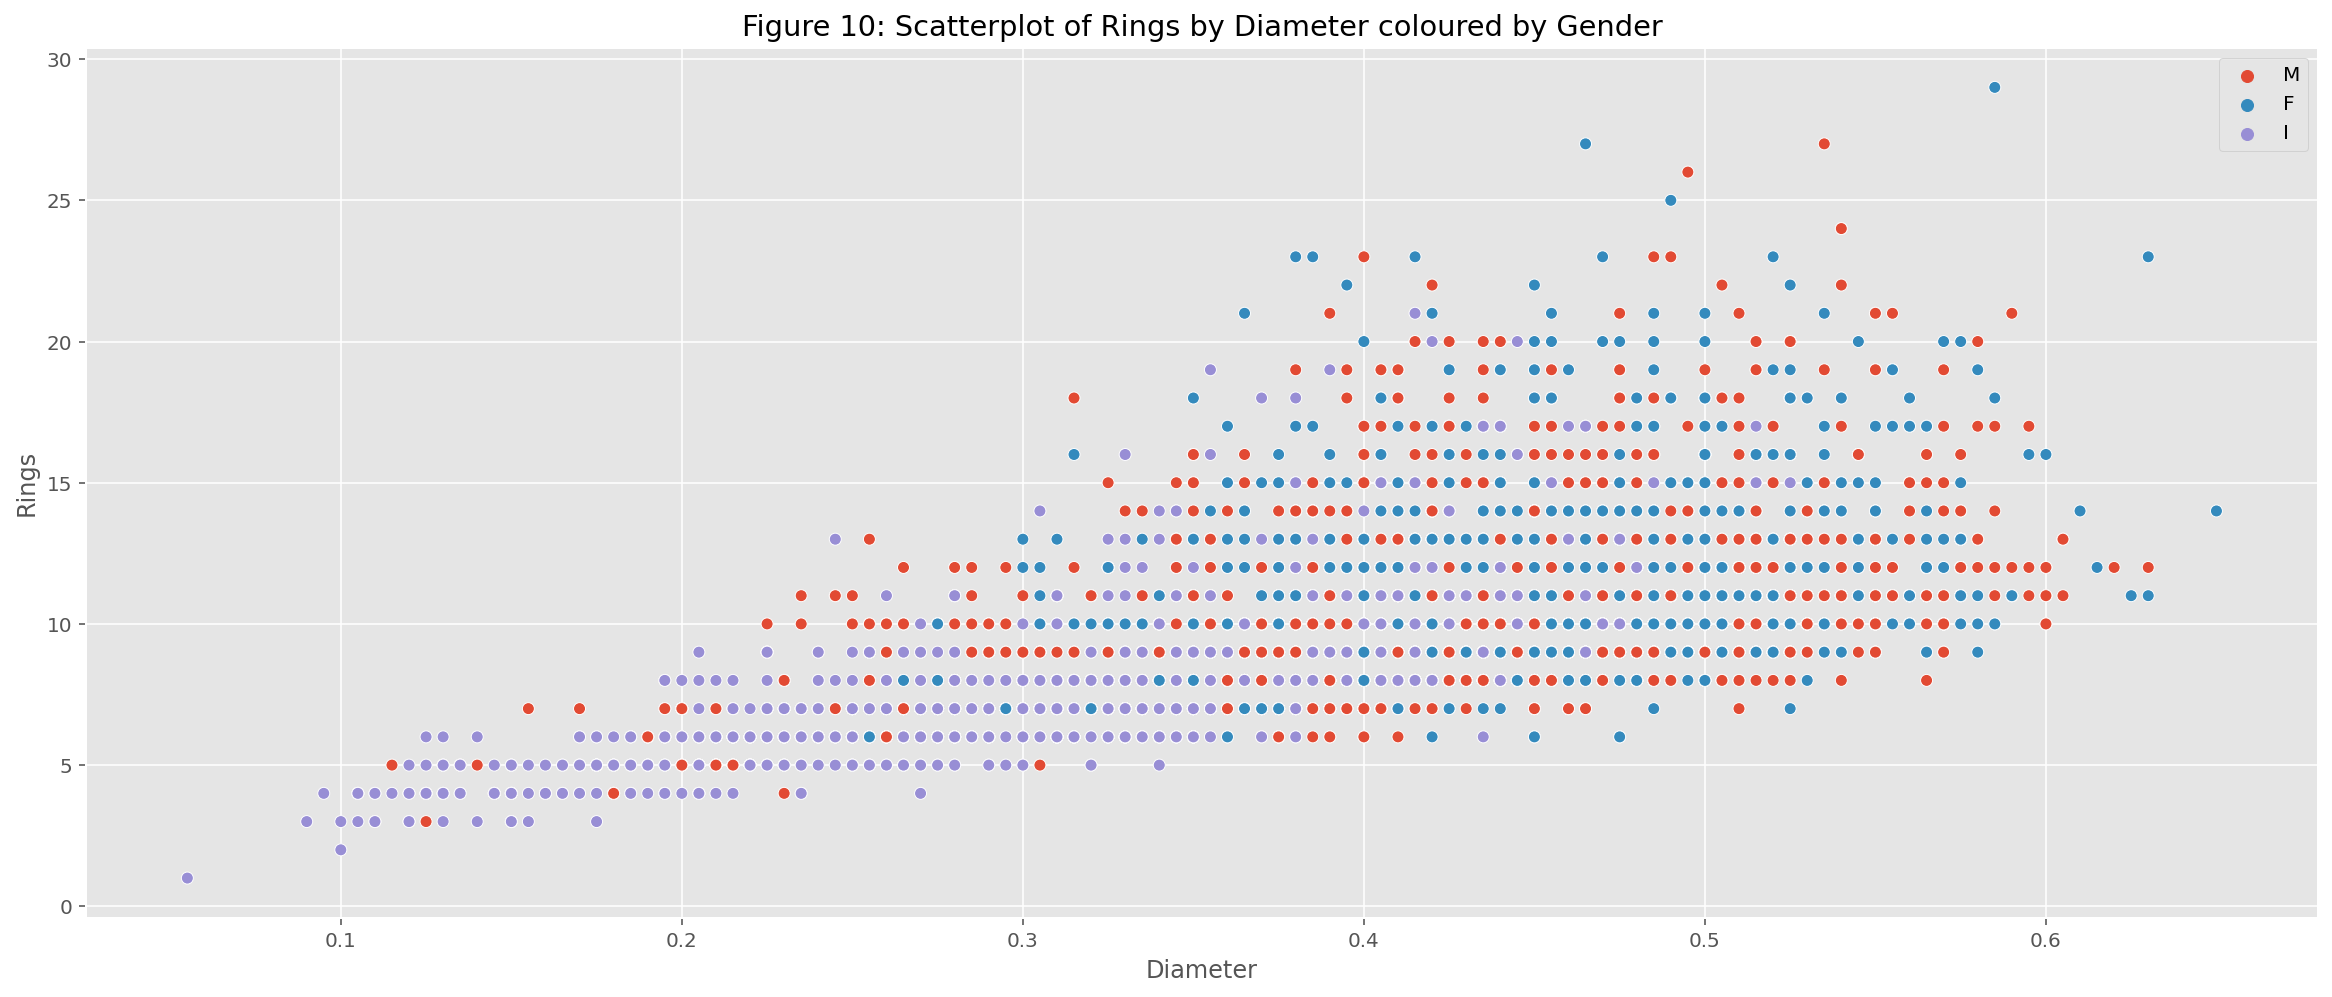

In [19]:
plt.figure(figsize = (20,8))

sns.scatterplot(df['Diameter'], df['Rings'], hue = df['Gender'])
plt.title('Figure 10: Scatterplot of Rings by Diameter coloured by Gender');
plt.legend(loc = 'upper right')
plt.show();

All these graph show that the in general Infant abalones are smaller than their adult counterparts and that they are more likely to have less rings. The graph also shows that size and number of rings are positively associated.

## Summary and Conclusion

Being able to predict the number of rings on an abalone has tangible real world application since the economical value of an abalone is tied to its age, which is the number of rings found on it +1.5 years. Traditional ways of counting the rings found on an abalone is tedious, boring and time-consuming, so being able to accurately predict the number of rings through measurements of other physical characteristics is important. This project aims to provide an accurate model to predict the number of rings on an abalone with the data given from the Abalone Dataset.

This is Phase 1 of the project, where we first did some data cleaning and preprocessing. The dataset used was already relatively clean and none of the features found in the dataset were redundant, so other than double checking the data for missing values and removing two observations that had a length of 0, there wasn't a significant amount of cleaning needed

Through graphs, we visualised the dataset to find any correlations between the target feature (Number of Rings) and the descriptive features. We can see that Infant abalones are more likely to have less rings than Adult abalones, it is also shown through our visualisations of the dataset that larger and heavier abalones will have more rings. This is most likely due to larger abalones being older and thus have more rings because they have had more time to grow.

## References

Warwick Nash. (1995). Abalone Data Set (UCI). Retrieved September 30, 2021 from http://https://archive.ics.uci.edu/ml/datasets/abalone